In [11]:
import os
import pickle
import numpy as np
import tensorflow.keras as keras
data_dir = "prepped_data/train_set/"

In [12]:
names = os.listdir(data_dir)


In [38]:
classes.shape

(2048, 12)

In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [52]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(128, 128, 4)
                 
                ))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))              
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(12))

model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.001))




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 126, 126, 32)      1184      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 128)      

In [59]:
name = names[0]

def load_dataset(name):
    with open(name, "rb") as f:
        dataset = pickle.load(f)

    data = []
    classes = []
    for elem in dataset:
        data_entry = np.array(np.stack(elem["data"], axis=-1), dtype=np.float32)
        data_entry += 1000
        data_entry /= 2000
        data.append(data_entry)

        class_entry = elem["classes"]
        class_entry = np.concatenate([class_entry[0] / 9, class_entry[1].flatten()])
        classes.append(class_entry)
    data = np.array(data)
    classes = np.array(classes)
    return data, classes


In [ ]:
for _ in range(20):
    print("===========")
    for name in names:
        data, classes = load_dataset(data_dir + name)
        loss_curve = model.fit(data, 
              classes,
              batch_size=200,
              epochs=5,
              verbose=1,
              validation_data=(tdata, tclasses))

Train on 2048 samples, validate on 2048 samples
Epoch 1/5
2048/2048 [==============================] - 44s 22ms/sample - loss: 0.1090 - val_loss: 0.1039
Epoch 2/5
2048/2048 [==============================] - 47s 23ms/sample - loss: 0.0984 - val_loss: 0.1064
Epoch 3/5
2048/2048 [==============================] - 43s 21ms/sample - loss: 0.0868 - val_loss: 0.1131
Epoch 4/5
2048/2048 [==============================] - 40s 19ms/sample - loss: 0.0740 - val_loss: 0.1080
Epoch 5/5
2048/2048 [==============================] - 40s 19ms/sample - loss: 0.0625 - val_loss: 0.1147
Train on 2048 samples, validate on 2048 samples
Epoch 1/5
2048/2048 [==============================] - 45s 22ms/sample - loss: 0.1768 - val_loss: 0.1091
Epoch 2/5
2048/2048 [==============================] - 41s 20ms/sample - loss: 0.1452 - val_loss: 0.1033
Epoch 3/5
2048/2048 [==============================] - 46s 23ms/sample - loss: 0.1298 - val_loss: 0.1044
Epoch 4/5
2048/2048 [==============================] - 44s 21ms/

In [60]:
tdata, tclasses = load_dataset("prepped_data/test_set/Pancreas_6pregenerated.pickle")

In [66]:
rclasses = model.predict(tdata)

In [68]:
rclasses[0]

array([ 1.0565341e+00, -3.9961743e-01,  2.3326729e-01,  9.5384091e-01,
       -9.9848118e-04, -3.0104714e-03,  8.1037637e-04,  9.5930386e-01,
       -1.7157756e-05,  8.6915912e-04,  3.4589525e-03,  9.5261550e-01],
      dtype=float32)

In [71]:
tclasses[0]

array([ 0.69142932, -1.63635466,  0.20688781,  0.99922277, -0.0304131 ,
       -0.02507803,  0.03017072,  0.99949486, -0.0099874 ,  0.02536911,
        0.00922301,  0.99963561])

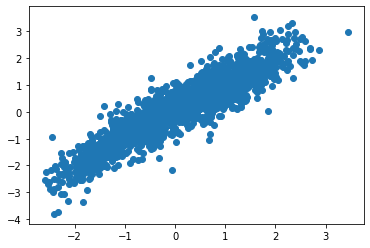

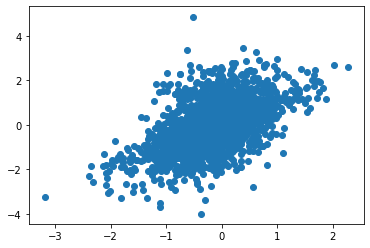

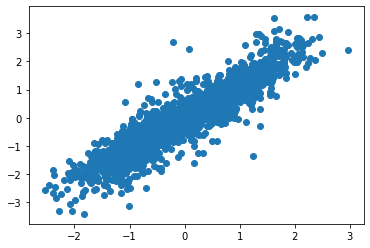

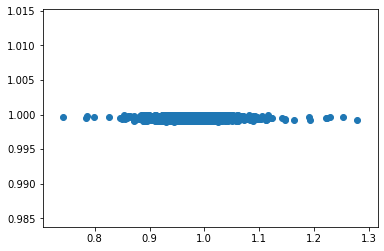

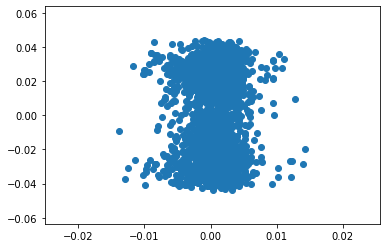

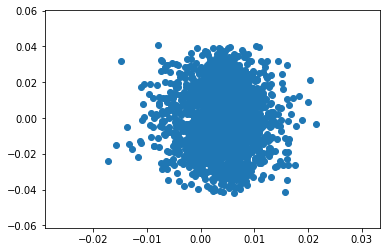

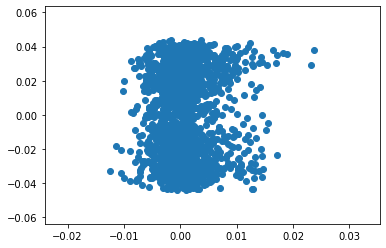

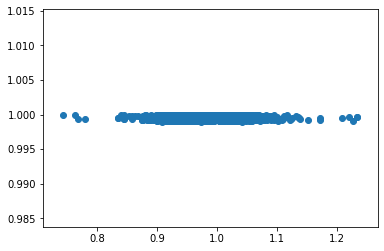

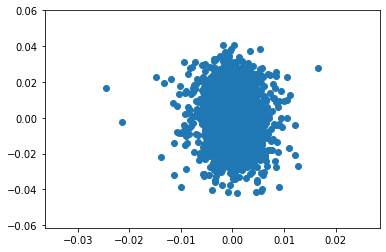

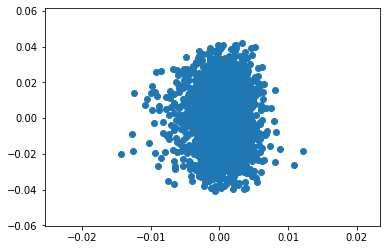

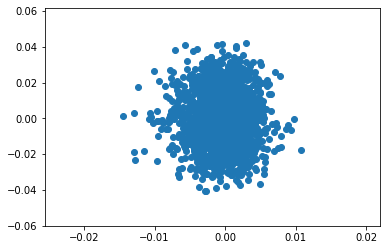

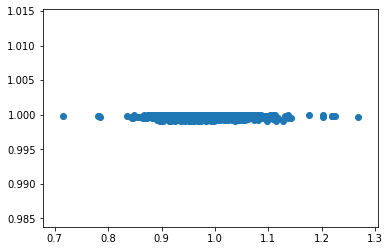

In [76]:
import matplotlib.pyplot as plt
for j in range(12):
    plt.scatter(rclasses[:, j], tclasses[:, j])
    plt.show()